<a href="https://colab.research.google.com/github/btalbr01/MLA_BTA/blob/main/MLA1_BTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1 <br>
Ben Albright<br>
CS430-ON<br>
Machine Learning in the Cloud

Getting imports and pulling df from csv

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [147]:
df = pd.read_csv('/content/gdrive/MyDrive/weather_2012.csv')

Displaying the head and tail of the table

In [148]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [149]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


Displaying and renaming columns

In [150]:
df.columns

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [151]:
df.rename({'Date/Time':'date_time', 'Temp (C)':'temp_c', 'Dew Point Temp (C)':'dew_point', 'Rel Hum (%)':'relative_humidity',
           'Wind Spd (km/h)':'wind_speed', 'Visibility (km)':'visibility', 'Stn Press (kPa)':'pressure', 'Weather':'weather'}, axis=1, inplace=True)

Getting standard statistics for numerical columns

In [152]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Adding a column to the end of the table that displays temperature in fahrenheit

In [153]:
df['temp_f'] = (9/5)*df['temp_c']+32

In [154]:
df

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,32.18
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,32.36
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,31.10
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,31.64


Moving temp_f to appear immediately before temp_c

In [155]:
col = df.pop('temp_f')
df.insert(1, "temp_f", col)

In [156]:
df

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,32.18,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,32.36,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,31.10,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,31.64,-0.2,-1.8,89,28,9.7,99.91,Snow


Displaying the data types of all the columns in the dataset

In [157]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

Converting the date_time column

In [158]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


Getting the average temperature (in F) for each month and writing it into an object called monthly_avg

In [159]:
monthly_avg = df.groupby(df['date_time'].dt.month)['temp_f'].mean()

Generating a scatterplot that compares the temperature against the relative humidity

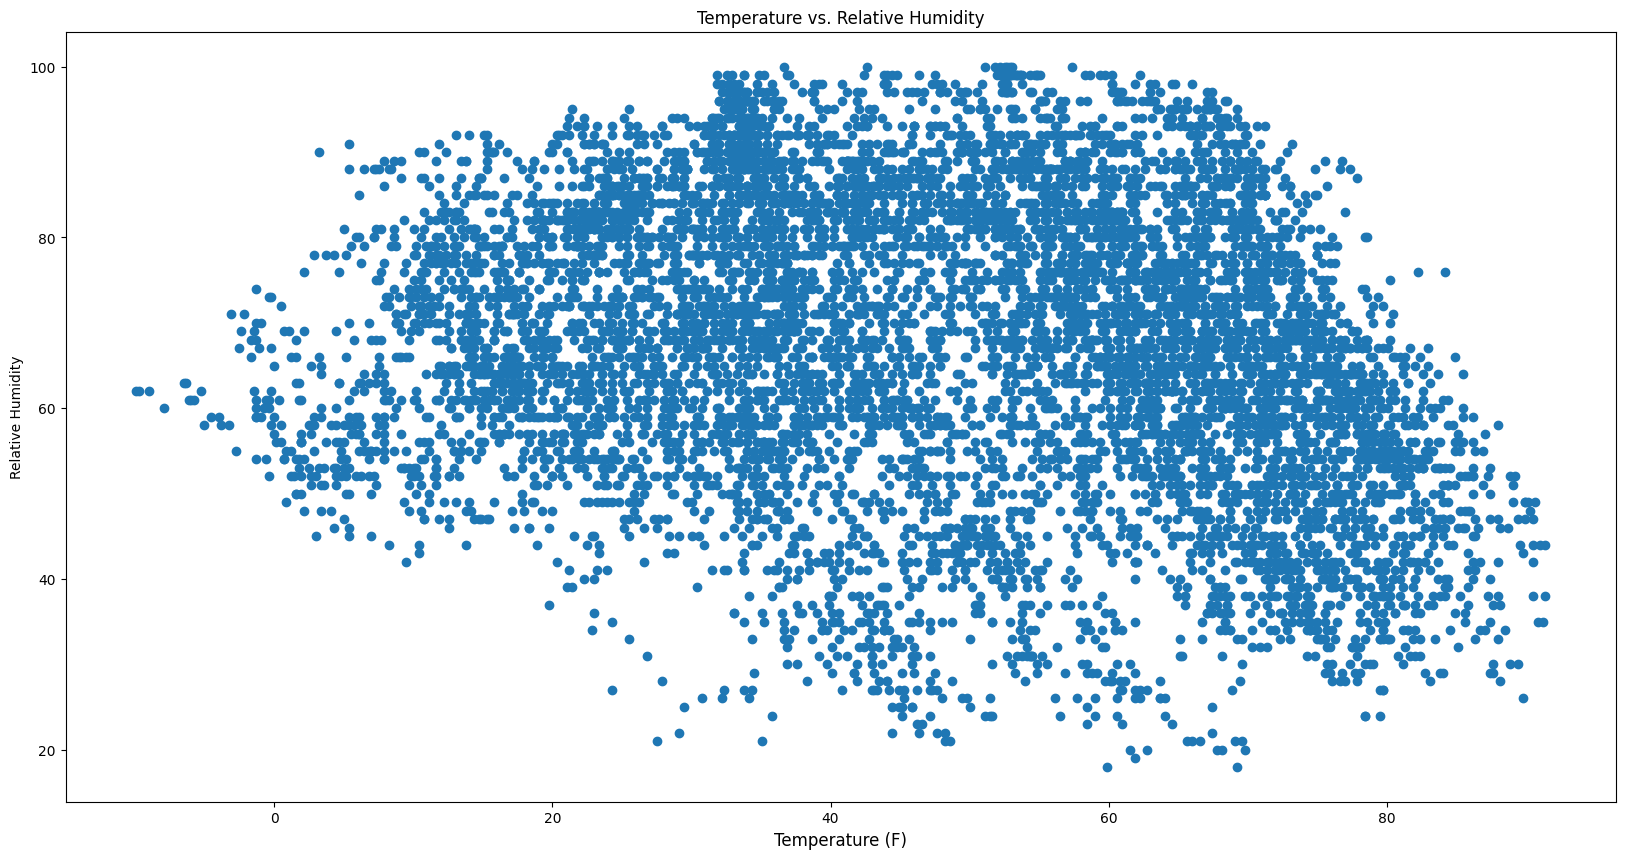

In [160]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(df['temp_f'], df['relative_humidity'])
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Relative Humidity')
plt.title('Temperature vs. Relative Humidity')
plt.show()


Generating a line chart that shows the average temperature per month

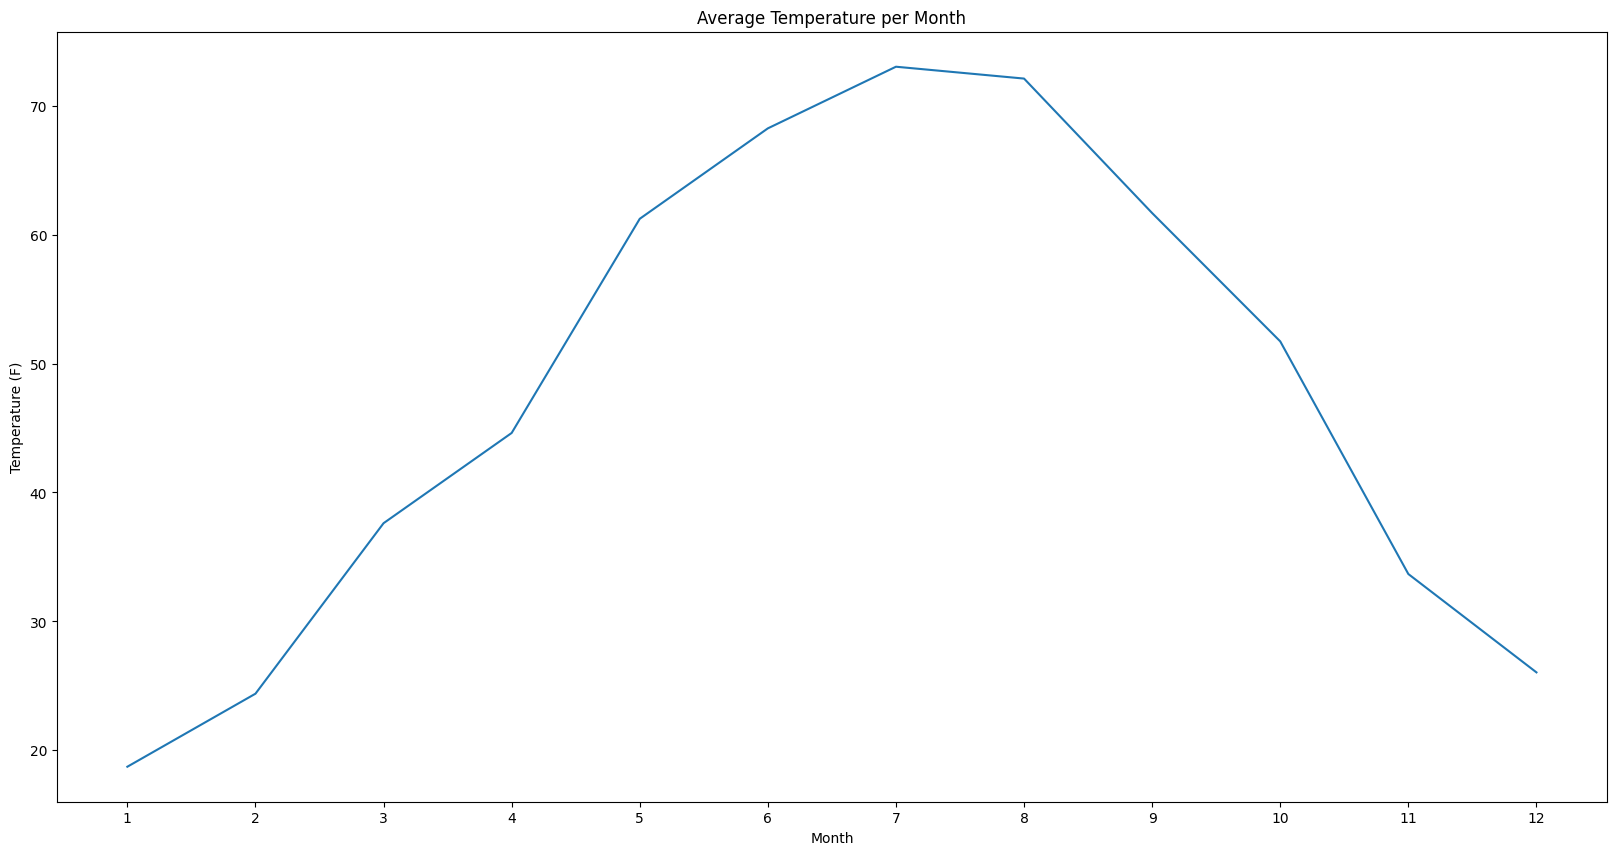

In [161]:
monthly_average_temp = df.groupby(df['date_time'].dt.month)['temp_f'].mean()

plt.figure(figsize=(20,10))
plt.plot(monthly_average_temp.index, monthly_average_temp.values)
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.title('Average Temperature per Month')
plt.xticks(monthly_average_temp.index)
plt.show()


Generating a box plot

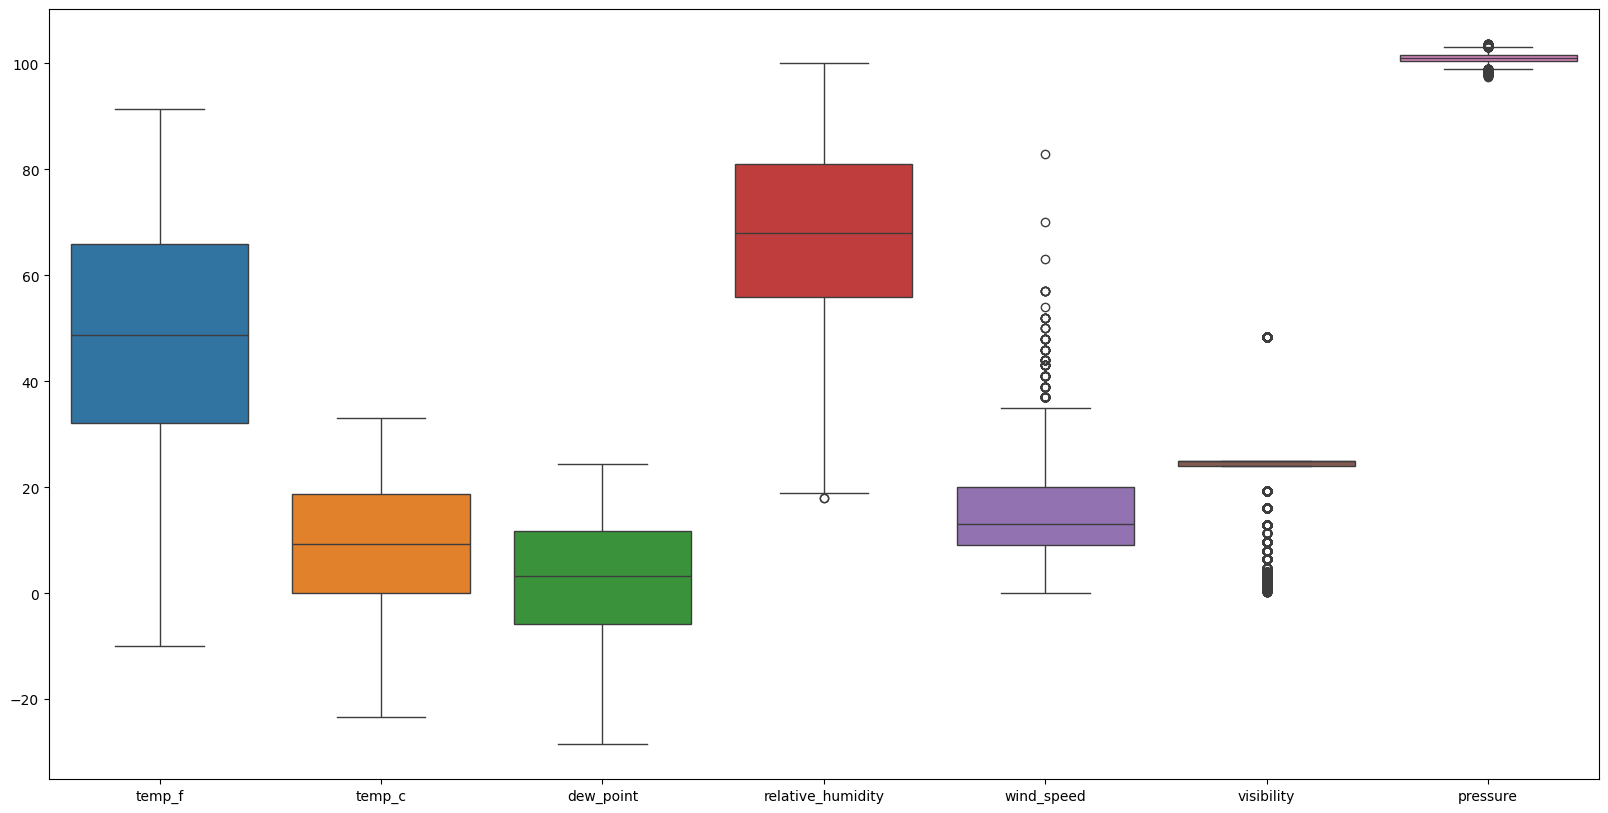

In [162]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()
